# Assigment 4: Data Analysis and Visualization

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

The data you will work with was taken from [Alaskan vegetation plots](https://daac.ornl.gov/ABOVE/guides/Arrigetch_Peaks_Veg_Plots.html) from 1978-1981. The data set is in the `data/` subdirectory in this repo in two .csv files containing information about research plots and the plant species covering the plots. **Please read the descriptions for the data, as they will help you answer the questions.** 

**Table 1: Data files**
| Data File Name |	Description |
| --- | --- |
| Arrigetch_Peaks_Environmental_Data.csv| Environmental characterization data for Arrigetch Peaks research plots |
| Arrigetch_Peaks_Species_Data.csv | Species cover data for Arrigetch Peaks research plots|

**Table 2. Arrigetch_Peaks_Environmental_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| PLANT_COMMUNITY_NAME	|  |	Primary vegetation types |
| ELEVATION |	m	| Elevation of the plots |
| ASPECT	| deg	| Aspect of the plots |
| SLOPE	| deg	| Slope of the plots |
| COVER_LITTER_LAYER	| % |	Percentage of litter layer cover in the plot |
|COVER_OPEN_WATER	| % | 	Percentage of open water cover in the plot |
| COVER_ROCK	| % |	Percentage of rock cover in the plot |
| COVER_CRUST	| % |	Percentage of crust cover in the plot |
| COVER_BARE_SOIL	| % |	Percentage of bare soil cover in the plot|
| REMARKS	 |  |	Field notes |

**Table 3. Arrigetch_Peaks_Species_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| species name | | data values are Species Cover Classes: where r (rare), + (common, but less than 1% cover), 1 (1-5 percent), 2 (6 to 25%), 3 (25 to 50%), 4 (51 to 75%), 5 (76 to 100%). |

## Question 1: Pandas (15 pt)

Load the two data sets into Python with Pandas. Name the environmental data frame `env`, and the species data frame `species`. Display the first few rows of each data frame. What are the dimensions of the two data frames? (2 pt)

Replace all values in both data frames that are `-9999` with `np.NaN`. (1 pt)

Print how many unique plant community names there are. (1 pt)

Print summary statistics for all numerical columns in `env`, excluding `"TURBOVEG_PLOT_NUMBER"`. (2 pt)

Merge the two data frames together by the column `TURBO_PLOT_NUMBER`. (1 pt)

How many rows in the merged data frame contain missing data? (1 pt)

Which species was present in the most plots? (3 pt)

For all rows in `species`, calculate the sum of all the columns (excluding `"TURBOVEG_PLOT_NUMBER"`) for each row. Add this sum as a new column called `"totals"`. (2 pt)

Read the description included above for the `species` data frame. Are there any inconsistencies between the description and the data? Explain. If there are inconsistences, what would you do to correct them? (2 pt)

In [3]:
import pandas as pd

env = pd.read_csv('data/Arrigetch_Peaks_Environmental_Data.csv') 
species = pd.read_csv('data/Arrigetch_Peaks_Species_Data.csv')

env.head() #displays first 5 rows of env dataframe
env.info() #The dimensions of the dataframe is 439 rows, 11 columns

species.head() #displays first 5 rows of species dataframe
species.info() #The dimensions of the dataframe is 439 rows, 409 columns

env.replace(-9999,"np.NaN") #replaces all -9999 values to np.NaN
species.replace(-9999,"np.NaN")

print(env.PLANT_COMMUNITY_NAME.unique()) #prints all unique values in column PLANT_COMMUNITY_NAME

cols = set(env.columns) - {'TURBOVEG_PLOT_NUMBER'} #creates separate set of all env columns, excluding TURBOVEG_PLOT_NUMBER
df = env[list(cols)] #initializes new set
df.describe() #prints summary statistics

env_species_merge = pd.concat([env, species], axis = 0) #combines both dataframes with same column inherent
print(env_species_merge) 

sum(env_species_merge.isnull().any(axis=1)) #There are 878 rows in the meged data frame that contain missing data

species_count = species.loc[:, species.columns!='TURBOVEG_PLOT_NUMBER'] #excludes TURBOVEG_PLOT_NUMBER column
sort = species_count.astype(bool).sum(axis=0) #if there is a True (non missing) value, take the sum
sort.sort_values(ascending=False) #Cetraria islandica is the species that was present in the most plots

species['totals'] = species.drop('TURBOVEG_PLOT_NUMBER', axis=1).sum(axis=1) #drops TURBOVEG_PLOT_NUMBER and sums all rows
print(species)

#There is an inconsistency, because there are data values above 5 which do not fit into the 1 to 5 data categorization that
#the description explains. One method to resolve this inconsistency would be to change all data values above 5 to 5. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TURBOVEG_PLOT_NUMBER  439 non-null    int64 
 1   PLANT_COMMUNITY_NAME  439 non-null    object
 2   ELEVATION             439 non-null    int64 
 3   ASPECT                439 non-null    int64 
 4   SLOPE                 439 non-null    int64 
 5   COVER_LITTER_LAYER    439 non-null    int64 
 6   COVER_OPEN_WATER      439 non-null    int64 
 7   COVER_ROCK            439 non-null    int64 
 8   COVER_CRUST           439 non-null    int64 
 9   COVER_BARE_SOIL       439 non-null    int64 
 10  REMARKS               439 non-null    object
dtypes: int64(9), object(2)
memory usage: 37.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Columns: 409 entries, TURBOVEG_PLOT_NUMBER to Xanthoria elegans
dtypes: float64(308), int64(101)
memory usage: 1.4 MB
['As

## Question 2: Plotting (15 pt)

Make a figure showing the relationship between elevation and cover rock percentage. Is there a positive relationship, negative relationship, or no relationship between the two variables? (3 pt)

Make a figure showing the distribution of the `"totals"` column you created in the `species` data frame. Print summary statistics for this column, as well. (3 pt)

Create a subset of `env` containing rows with the plant community names `"Caricetum scirpoideae-rupestris"`,`"Pedicularo kanei-Caricetum glacialis"`, and `"Saxifrago tricuspidatae-Artemisietum alaskanae"`. (2 pt)

Create a figure to compare the mean cover bare soil percentage of the plant communities. Describe what the figure tells us-> are there differences among the plant communities in cover bare soil percentage? Which has the highest median value? The lowest? Are there differences in the spread among the communities? (4 pt)

For all figures, label your axes descriptively with units. If necessary, create legends. Make your figures large enough to be easily readable, and **make sure that no text is overlapping**. Save all figures, and make sure to commit them (3 pt).




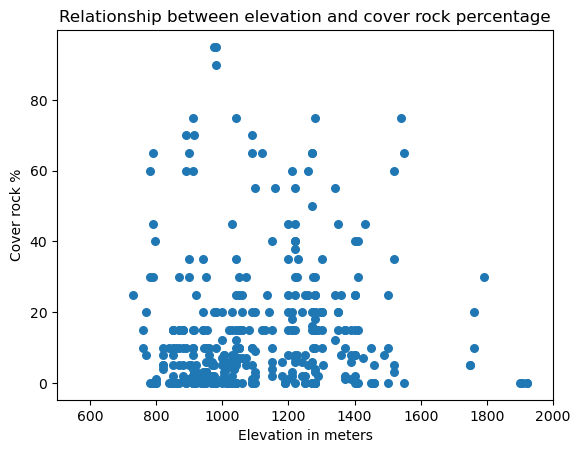

,ELEVATION,COVER_ROCK
ELEVATION,1.000000,0.085112
COVER_ROCK,0.085112,1.000000


In [4]:
import matplotlib.pyplot as plt

plt.scatter(env["ELEVATION"], env["COVER_ROCK"], s = 30)
plt.xlim(500,2000)
plt.xlabel("Elevation in meters")
plt.ylabel("Cover rock %")
plt.title("Relationship between elevation and cover rock percentage")
plt.savefig("elevation_cover_rock.png")
plt.show()

df = env[["ELEVATION", "COVER_ROCK"]]
df.corr(method = 'pearson') #calcuating correlation coefficient for more accurate assessement of variable relationship

#because r = 0.085 == 0, I would conclude that there is little to no relationship between these variables. 

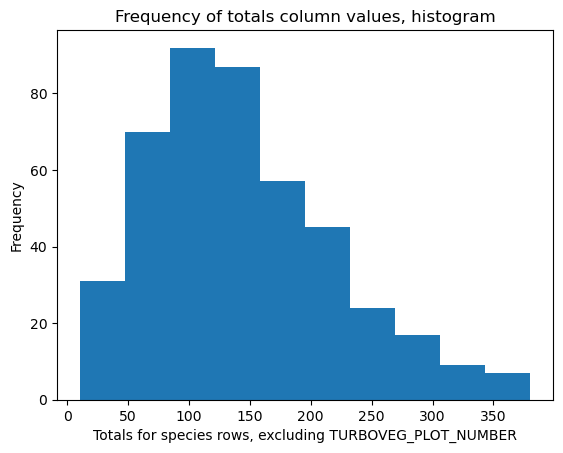

count    439.000000
mean     144.146469
std       74.729961
min       10.000000
25%       87.000000
50%      132.000000
75%      188.250000
max      380.500000
Name: totals, dtype: float64

In [5]:
plot = species['totals'] #subset of species by column "totals"

plt.hist(plot)
plt.xlabel("Totals for species rows, excluding TURBOVEG_PLOT_NUMBER")
plt.ylabel("Frequency")
plt.title("Frequency of totals column values, histogram")
plt.savefig("species_totals_histogram.png")
plt.show()

plot.describe() #summary statistics of column "totals"

In [6]:
env_subset = env.loc[(env['PLANT_COMMUNITY_NAME'] == 'Caricetum scirpoideae-rupestris') 
                  | (env['PLANT_COMMUNITY_NAME'] == 'Pedicularo kanei-Caricetum glacialis') 
                  | (env['PLANT_COMMUNITY_NAME'] == 'Saxifrago tricuspidatae-Artemisietum alaskanae'),:] 
                #had to do it this way because I kept receiving keyword errors
env_subset.head() #cleaner way to print subset

,TURBOVEG_PLOT_NUMBER,PLANT_COMMUNITY_NAME,ELEVATION,ASPECT,SLOPE,COVER_LITTER_LAYER,COVER_OPEN_WATER,COVER_ROCK,COVER_CRUST,COVER_BARE_SOIL,REMARKS
253,11178,Caricetum scirpoideae-rupestris,1020,270,-9999,60,0,15,0,12,Published releves in Table 19 (Cooper 1986) un...
254,11179,Caricetum scirpoideae-rupestris,1030,270,-9999,25,0,45,0,35,Published releves in Table 19 (Cooper 1986) un...
255,11180,Caricetum scirpoideae-rupestris,1050,315,-9999,40,0,25,0,25,Published releves in Table 19 (Cooper 1986) un...
256,11181,Caricetum scirpoideae-rupestris,1040,315,-9999,60,0,12,0,8,Published releves in Table 19 (Cooper 1986) un...
257,11182,Caricetum scirpoideae-rupestris,1090,315,-9999,65,0,0,0,25,Published releves in Table 19 (Cooper 1986) un...


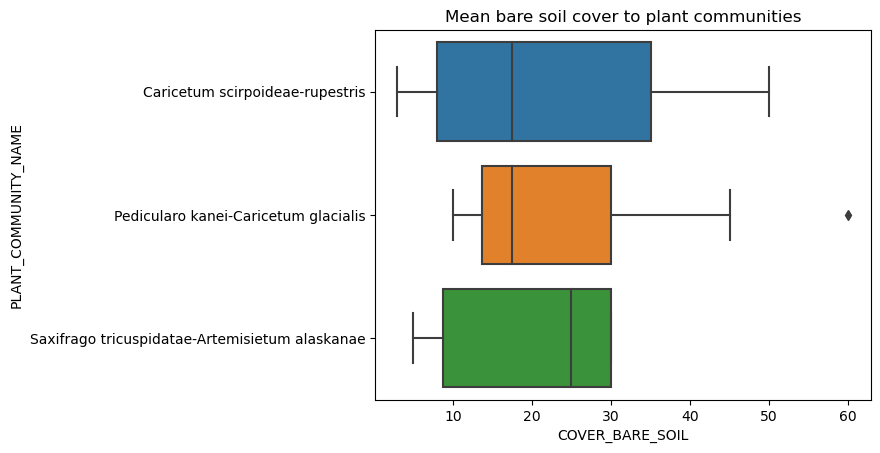

In [10]:
import seaborn as sns #practiced using seaborn as well

sns.boxplot(data=env_subset, x="COVER_BARE_SOIL", y="PLANT_COMMUNITY_NAME").set(title="Mean bare soil cover to plant communities")
plt.savefig('plant_communities_and_cover_bare_soil.png')

#Looking at the graph, one would notice that the largest sample spread is with Caricetum scirpoideae-rupestris and the smallest
#sample spread is with Saxifrago tricuspidatae-Artemisietum alaskanae. However, the highest mean bare soil cover median 
#belongs to Saxifrago tricuspidatae-Artemisietum alaskanae, while the lowest belongs to Pedicularo kanei-Caricetum glacialis and
#Caricetum scirpoideae-rupestris. This graph, being a boxplot, describes three primary statistical measures of the relationship
#between mean bare soil cover to our subsetted plant communities: locality, spread, and skewness. 